![title](../images/cross-validation.png)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('../input/train.csv', index_col='Id')
test_data = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [8]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


In [9]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
    return scores

In [11]:
results = {}
for n_estimators in [5, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]:
    scores = get_score(n_estimators)
    print('For {} n_estimators mae value is {}'.format(str(n_estimators), str(scores.mean())))
    results[n_estimators] = scores.mean()

For 5 n_estimators mae value is 20707.39876712329
For 50 n_estimators mae value is 18276.410356164386
For 100 n_estimators mae value is 18054.97936073059
For 150 n_estimators mae value is 17964.667534246575
For 200 n_estimators mae value is 17937.141941780825
For 250 n_estimators mae value is 17935.837222961512
For 300 n_estimators mae value is 17923.89181974342
For 350 n_estimators mae value is 17918.986291026
For 400 n_estimators mae value is 17929.15917131441
For 450 n_estimators mae value is 17917.665304486483
For 500 n_estimators mae value is 17917.91991493803
For 550 n_estimators mae value is 17921.91136476309
For 600 n_estimators mae value is 17909.57481686236


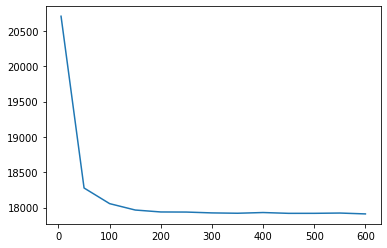

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

keys = list(results.keys())
values = list(results.values())
plt.plot(keys, values)
plt.show()